In [215]:
%pylab inline
from astropy import units as u
from astropy import constants
import biff
from weinberg_method import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'chararray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

## Constants

In [3]:
# Gravitational constants
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print(G_c)

# Scale lengths
r_sLMC = 30.0
r_sMW = 40.85

# Potential From N-body simulations to units of *** 
pot_factor = G_c/43007.1*1E10 




4.518359396265313e-39 kpc3 / (s2 solMass)


In [4]:
# Orbit of the N-body LMC-MW simulation
lmc_orbit = np.loadtxt('../LMC_orbit/orbits/LMC6_H1.txt')
#! head -1 ../LMC_orbit/orbits/LMC6_H1.txt

# Initial position of LMC
x_lmc_i = lmc_orbit[0,2]
y_lmc_i = lmc_orbit[0,3]
z_lmc_i = lmc_orbit[0,4]

print(x_lmc_i, y_lmc_i, z_lmc_i)

# Present position of LMC
x_lmc_f = lmc_orbit[119,2]
y_lmc_f = lmc_orbit[119,3]
z_lmc_f = lmc_orbit[119,4]

11.579168 247.827392 129.886137


# Computing the potential
## IDEA: 

How to compute the potential from the inner LMC outside the LMC? 

Compute the Snlm Tnlm coefficients of the inner LMC (in wich the lmc is spherical) and compute
the potential in all the positions without taking the inner particles. 

In [5]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [217]:
## Reading the data from MASKING the LMC

LMC_inn = np.loadtxt('../LMC_innf.txt')
LMC_out = np.loadtxt('../LMC_outf.txt')
MW = np.loadtxt('../MWf.txt')
All_out = np.loadtxt('../All_outf.txt')


In [218]:
# Defining the masses of particles and the potential from the N-body simulations!
LMC_inn_M = LMC_inn[:,3]
LMC_inn_pot = LMC_inn[:,4] * pot_factor.value

LMC_out_M = LMC_out[:,3]
LMC_out_pot = LMC_out[:,4] * pot_factor.value

MW_M = MW[:,3]
MW_pot = MW[:,4] * pot_factor.value

All_out_M = All_out[:,3]
All_out_pot = All_out[:,4] * pot_factor.value


In [219]:
LMC_inn_pos = np.array([LMC_inn[:,0], LMC_inn[:,1], LMC_inn[:,2]])
LMC_inn_pos_cm = np.array([LMC_inn[:,0]-x_lmc_i, LMC_inn[:,1]-y_lmc_i, LMC_inn[:,2]-z_lmc_i])

LMC_out_pos = np.array([LMC_out[:,0], LMC_out[:,1], LMC_out[:,2]])
All_out_pos = np.array([All_out[:,0], All_out[:,1], All_out[:,2]])
All_out_pos_lmccm = np.array([All_out[:,0]-x_lmc_i, All_out[:,1]-y_lmc_i, All_out[:,2]-z_lmc_i])

MW_pos = np.array([MW[:,0], MW[:,1], MW[:,2]])
MW_pos_lmccm = np.array([MW[:,0]-x_lmc_i, MW[:,1]-y_lmc_i, MW[:,2]-z_lmc_i])

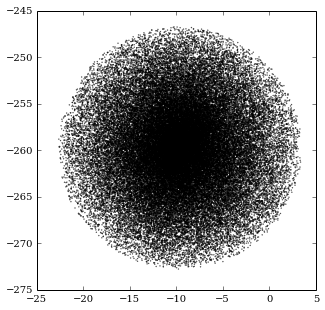

In [246]:
figure(figsize=(5,5))
scatter(LMC_inn_pos_cm[0], LMC_inn_pos_cm[1], s=0.1, c='k')

(-500, 500)

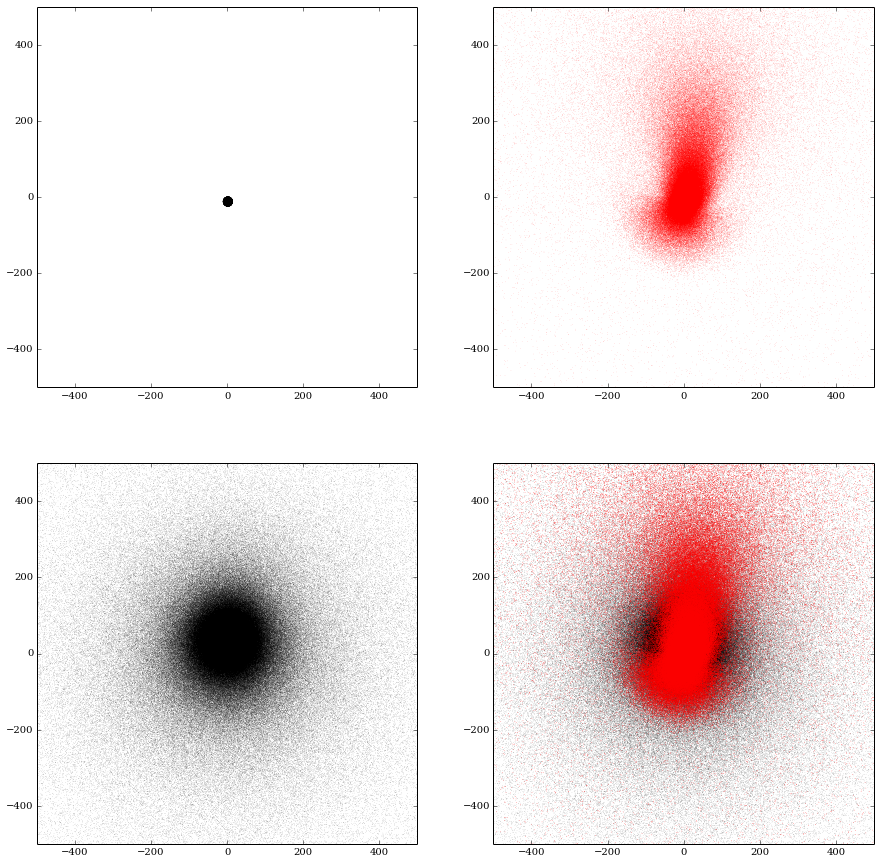

In [221]:
figure(figsize=(15,15))

subplot(2, 2, 1)
scatter(LMC_inn_pos[0], LMC_inn_pos[1], s=0.1, edgecolor='none', c='k')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 2)
scatter(LMC_out_pos[0], LMC_out_pos[1], s=0.1, edgecolor='none', c='r')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 3)
scatter(MW_pos[0], MW_pos[1], s=0.1,edgecolor='none', c='k')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 4)
scatter(MW_pos[0], MW_pos[1], s=0.1,edgecolor='none', c='k')
scatter(LMC_out_pos[0], LMC_out_pos[1], s=0.3, edgecolor='none', c='r')
xlim(-500, 500)
ylim(-500, 500)

In [12]:
## Potential of the MW on the MW particles..

## Warning check the mass All_out_M because no all the particles outised have the same mass! this might be
#fixed when the LMC particles and MW particles have the same mass in the n-body simulation!

All_out_M = All_out_M.astype(np.double)
Snlm_All, Tnlm_All, nlms_All = STnlm(np.ascontiguousarray(All_out_pos.T), All_out_M, r_sMW, 10, 0)
pot_All_All = biff.potential(np.ascontiguousarray(All_out_pos.T), Snlm_All, Tnlm_All, 10, 0, G_c.value, All_out_M[0], r_sMW)

In [266]:
print(len(pot_All_All))

1063352


In [228]:
## Potential of the MW on the inner LMC particles..

pot_All_LMC = biff.potential(np.ascontiguousarray(LMC_inn_pos.T), Snlm_All, Tnlm_All, 10, 0, G_c.value, All_out_M[0], r_sMW)

In [229]:
print(np.min(np.abs(pot_All_All)))
print(np.min(np.abs(pot_All_LMC)))

1.39820352324e-47
1.2052821902e-44


In [230]:
np.shape(All_out_pos[1])

(1427090,)

In [231]:
x_lmc = LMC_inn_pos[0]
y_lmc = LMC_inn_pos[1]
z_lmc = LMC_inn_pos[2]

index_lmc = np.where(np.sqrt((x_lmc-x_lmc_i)**2.0 + (y_lmc-y_lmc_i)**2.0 + (z_lmc-z_lmc_i)**2.0)<400)[0]
pot_All_LMC_cut = pot_All_LMC[index_lmc]

1.2052821902e-44 1.67136324386e-44


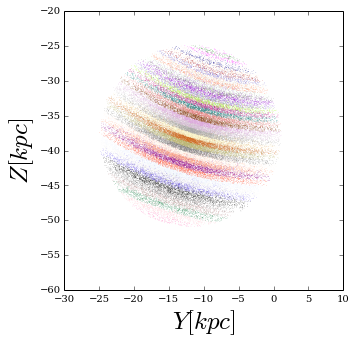

In [252]:
print(min(np.abs(pot_All_LMC)), max(np.abs(pot_All_LMC)))

pot_cuts = np.linspace(min(np.abs(pot_All_LMC)), max(np.abs(pot_All_LMC)), 40)
#c = ['darkred', 'darkblue', 'darkgreen', 'gold',
    # 'r', 'b', 'g', 'y', 'tomato','salmon','cyan',
    #'purple', 'magenta', 'orange', 'lime', 'k']
#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,40):
    index_c = np.where((np.abs(pot_All_LMC)<pot_cuts[i]) & (np.abs(pot_All_LMC)>pot_cuts[i-1]))[0]
    #print(len(index_c))
    plt.scatter(y_lmc[index_c], z_lmc[index_c], c=colors[i-1], edgecolors='none', s=0.2)
    
ylim(-60, -20)
xlim(-30, 10)
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('LMC_pot_MWf.png', bbox_inches='tight', dpi=300)   


In [269]:
All_all_pos_x = np.concatenate([All_out_pos[0], LMC_inn_pos[0]])
All_all_pos_y = np.concatenate([All_out_pos[1], LMC_inn_pos[1]])
All_all_pos_z = np.concatenate([All_out_pos[2], LMC_inn_pos[2]])

All_all_pot = np.concatenate([pot_All_All, pot_All_LMC])

index_cut = np.where(np.sqrt(All_all_pos_x**2.0 + All_all_pos_y**2.0 + All_all_pos_z**2.0) < 500)[0]

All_posx = All_all_pos_x[index_cut]
All_posy = All_all_pos_y[index_cut]
All_posz = All_all_pos_z[index_cut]

index_cut3 = np.where(np.sqrt(All_out_pos[0]**2 + All_out_pos[1]**2.0 + All_out_pos[2]**2.0) < 500)[0]
print(len(index_cut3))
print(len(All_out_pos[0]))
pot_All_All_cut = pot_All_All[index_cut3]

print(len(pot_All_All_cut))


1239376
1427090


IndexError: index 1063352 is out of bounds for size 1063352

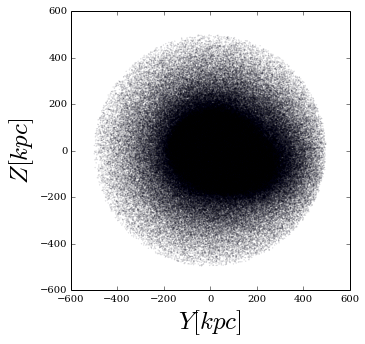

In [236]:
figure(figsize=(5,5))
plt.scatter(All_all_pos_y[index_cut], All_all_pos_z[index_cut], s=0.1, alpha=0.2)
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('LMC+MWf.png', bbox_inches='tight', dpi=300)

In [256]:
colors = []
for name, hex in matplotlib.colors.cnames.items():
    colors.append(str(hex))
print(len(colors))
print(np.random.randint(147))

147
102


In [257]:
#print(min(np.abs(All_all_pot[index_cut])), max(np.abs(All_all_pot[index_cut])))
pot_cuts_all = np.linspace(min(np.abs(All_all_pot[index_cut])), max(np.abs(All_all_pot[index_cut])), 40)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,40):
    index_c = np.where((np.abs(All_all_pot[index_cut])<pot_cuts_all[i]) & 
                       (np.abs(All_all_pot[index_cut])>pot_cuts_all[i-1]))[0]
    #print(len(index_c))
    plt.scatter(All_posy[index_c], All_posz[index_c], 
                c=colors[np.random.randint(147)], edgecolors='none', s=0.1)
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('All_pot_MWf.png', bbox_inches='tight')

IndexError: index 1136262 is out of bounds for size 1136262

In [ ]:
print pot_MW_out[0] 
print MW_pot[0] * pot_factor

In [ ]:
# Potential of the LMC on the LMC particles and on the outter particles 

LMC_inn_M = LMC_inn_M.astype(np.double)
Snlm_LMC, Tnlm_LMC, nlms_LMC = STnlm(np.ascontiguousarray(LMC_inn_pos_cm.T), LMC_inn_M, r_sLMC, 10, 0)
pot_LMC_LMC = biff.potential(np.ascontiguousarray(LMC_inn_pos_cm.T), Snlm_LMC, Tnlm_LMC, 10, 0, G_c.value, LMC_inn_M[0], r_sLMC)
pot_LMC_All = biff.potential(np.ascontiguousarray(All_out_pos_lmccm.T), Snlm_LMC, Tnlm_LMC, 10, 0, G_c.value, LMC_inn_M[0], r_sLMC)

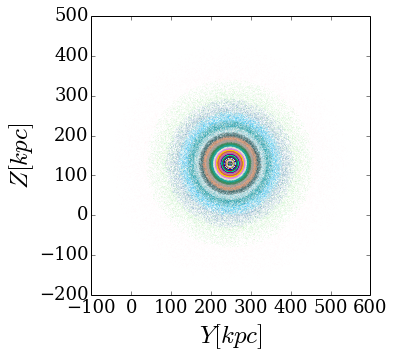

In [121]:
pot_cuts_lmc = np.linspace(min(np.abs(pot_LMC_LMC)), max(np.abs(pot_LMC_LMC)), 40)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,40):
    index_c = np.where((np.abs(pot_LMC_LMC)<pot_cuts_lmc[i]) & 
                       (np.abs(pot_LMC_LMC)>pot_cuts_lmc[i-1]))[0]
    #print(len(index_c))
    plt.scatter(LMC_inn_pos[1,index_c], LMC_inn_pos[2,index_c], 
               c=colors[np.random.randint(147)], edgecolors='none', s=0.1)
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('LMC_pot_LMCf.png', bbox_inches='tight')   


In [173]:
index_cut2 = np.where(np.sqrt((All_out_pos[0]+x_lmc_i)**2 + (All_out_pos_lmccm[1]+y_lmc_i)**2.0 + (All_out_pos_lmccm[2]+z_lmc_i)**2.0) < 500)[0]
pot_LMC_All_cut = pot_LMC_All[index_cut2]

x_all = All_out_pos[0,index_cut2]
y_all = All_out_pos[1,index_cut2]
z_all = All_out_pos[2,index_cut2]

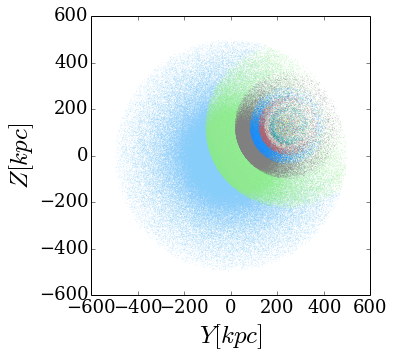

In [196]:
pot_cuts_lmc = np.linspace(min(np.abs(pot_LMC_All_cut)), max(np.abs(pot_LMC_All_cut)), 30)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,20):
    index_c = np.where((np.abs(pot_LMC_All_cut)<pot_cuts_lmc[i]) & 
                       (np.abs(pot_LMC_All_cut)>pot_cuts_lmc[i-1]))[0]
    #print(len(index_c))
    plt.scatter(y_all[index_c], z_all[index_c], 
               c=colors[np.random.randint(147)], edgecolors='none', s=0.2)
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('LMC_pot_All.png', bbox_inches='tight')   

In [212]:
# Total potential!!

LMC_inn_pot_t = pot_LMC_LMC + pot_All_LMC_cut
MW_pot_t = All_all_pot[index_cut2] + pot_LMC_All_cut

pot_ALL = np.concatenate([MW_pot_t, LMC_inn_pot_t])



All_x = np.concatenate([x_all, LMC_inn_pos[0]])
All_y = np.concatenate([y_all, LMC_inn_pos[1]])
All_z = np.concatenate([z_all, LMC_inn_pos[2]])


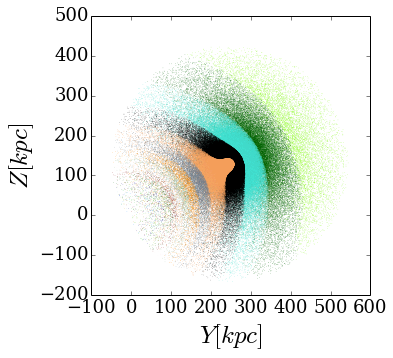

In [189]:
pot_lmc = np.linspace(min(np.abs(LMC_inn_pot_t)), max(np.abs(LMC_inn_pot_t)), 40)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,20):
    index_c = np.where((np.abs(LMC_inn_pot_t)<pot_lmc[i]) & 
                       (np.abs(LMC_inn_pot_t)>pot_lmc[i-1]))[0]
    #print(len(index_c))
    plt.scatter(LMC_inn_pos[1,index_c], LMC_inn_pos[2,index_c], 
               c=colors[np.random.randint(147)], edgecolors='none', s=0.2)
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('pot_LMC.png', bbox_inches='tight')   

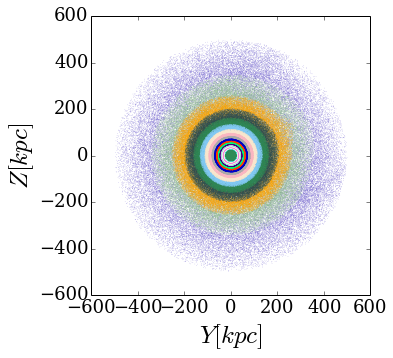

In [194]:
pot_all_out = np.linspace(min(np.abs(MW_pot_t)), max(np.abs(MW_pot_t)), 30)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,20):
    index_c = np.where((np.abs(MW_pot_t)<pot_all_out[i]) & 
                       (np.abs(MW_pot_t)>pot_all_out[i-1]))[0]
    #print(len(index_c))
    plt.scatter(y_all[index_c], z_all[index_c], 
               c=colors[np.random.randint(147)], edgecolors='none', s=0.2)
    
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('pot_All_out.png', bbox_inches='tight')   

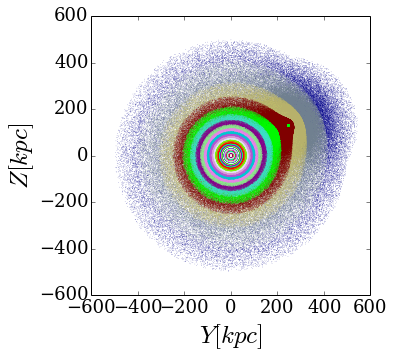

In [213]:
pot_all = np.linspace(min(np.abs(pot_ALL)), max(np.abs(pot_ALL)), 40)

#print(pot_cuts)
figure(figsize=(5,5))
for i in range(1,40):
    index_c = np.where((np.abs(pot_ALL)<pot_all[i]) & 
                       (np.abs(pot_ALL)>pot_all[i-1]))[0]
    #print(len(index_c))
    plt.scatter(All_y[index_c], All_z[index_c], 
               c=colors[np.random.randint(147)], edgecolors='none', s=0.2)
    
    
xlabel('$Y[kpc]$', fontsize=25)
ylabel('$Z[kpc]$', fontsize=25)
savefig('pot_All.png', bbox_inches='tight')   